## Ausarbeitung "Digitale Signalverarbeitung und Regelungen"

### Aufgabe 1: Spektralanalyse zur Fehlererkennung
Armin Kulla

Martikelnummer: 1072875 

1. Einlesen und Abspielen der Sounddateien

In [6]:
from SpectrumAnalysis import Soundfile
%matplotlib notebook

#Einlesen der Sounddateien  
EngineFaulty1 = Soundfile("engineFaulty1.wav", "Engine Faulty 1",'green')
EngineFaulty2 = Soundfile("engineFaulty2.wav", "Engine Faulty 2",'red')
EngineNominal = Soundfile("engineNominal.wav", "Engine Nominal" ,'blue')

#Abspielen der Sounddateien
#EngineFaulty1.play()
#EngineFaulty2.play()
#EngineNominal.play()

2. Grafische Gegenüberstellung der Rohdaten (Stereosignal wurde auf einen Kanal gemittelt, Amplitude normiert) 

<IPython.core.display.Javascript object>


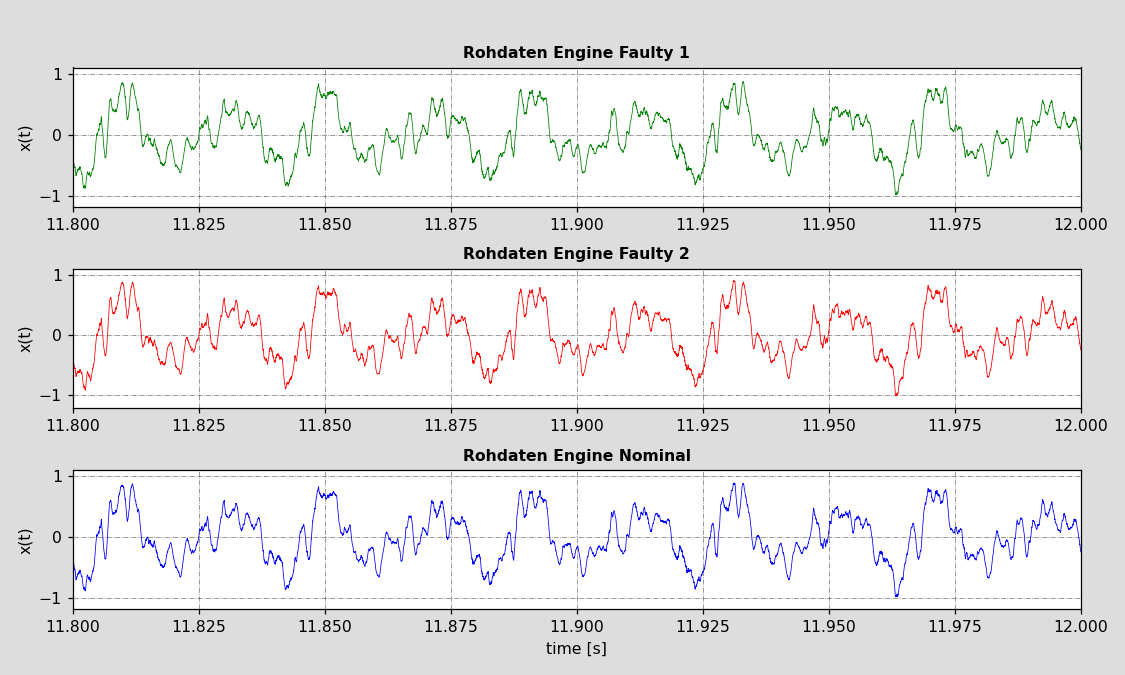

In [14]:
from SpectrumAnalysis import plotData
plotData(Soundfiles=[EngineFaulty1, EngineFaulty2, EngineNominal],
         StartValue=11.8, EndValue=12,combined=False)

Die kombinierte Ansicht verdeutlicht das kein Fehlerfall anhand der Rohdaten erkannt werden kann:

<IPython.core.display.Javascript object>


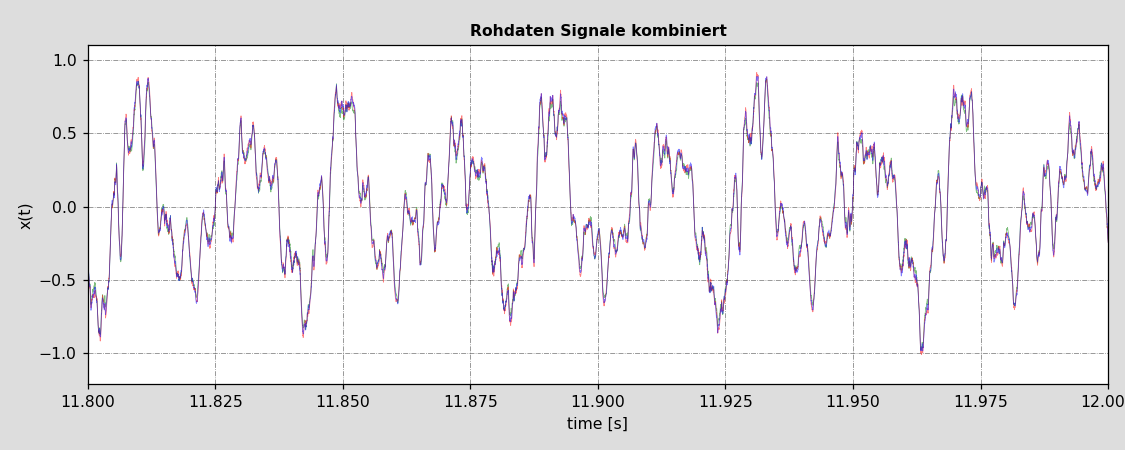

In [22]:
plotData(Soundfiles=[EngineFaulty1, EngineFaulty2, EngineNominal],
         StartValue=11.8, EndValue=12,combined=True)

Fazit: 

    Die Rohdaten sind nahezu identisch. Nur minimale Abweichungen ohne weitere Aussagekraft sind sichtbar. 
    
    Es lassen sich keine Fehlerfälle durch diese Betrachtung erkennen.

3. Frequenzanalyse aller drei Aufnahmen und grafische Darstellung der Spektren.

<IPython.core.display.Javascript object>


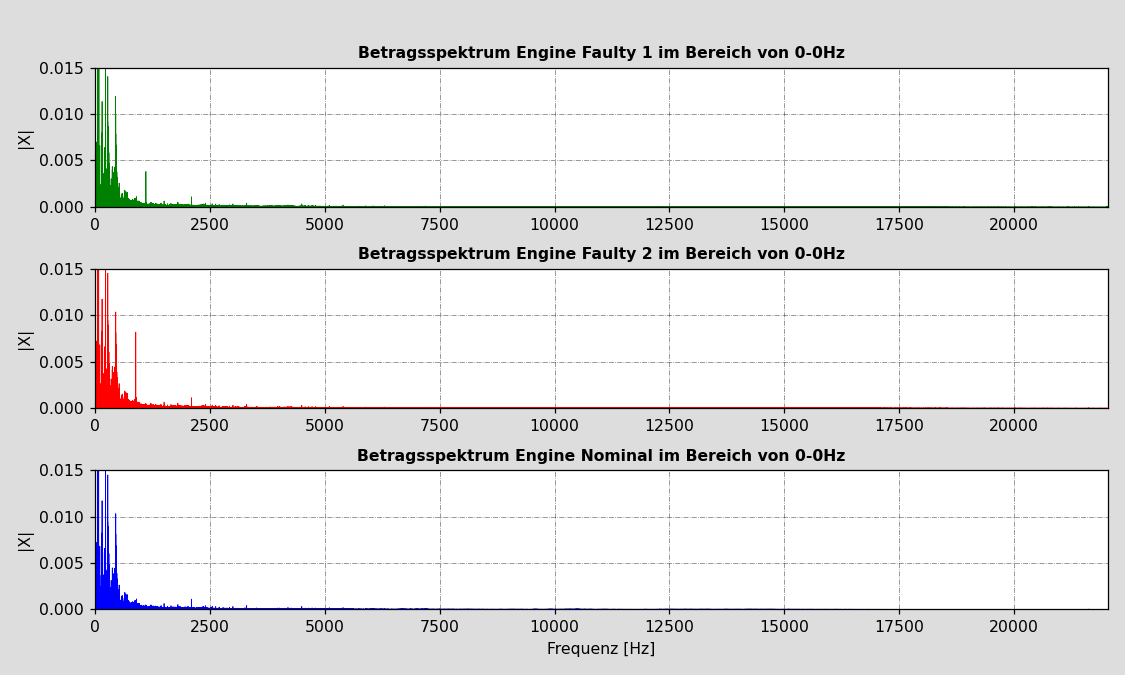

In [10]:
from SpectrumAnalysis import plotDataFFT
plotDataFFT(Soundfiles=[EngineFaulty1, EngineFaulty2, EngineNominal],
            StartValue_X=0,EndValue_X=22050,StartValue_Y=0,EndValue_Y=0.015, combined=False)

Fazit:

Zulässige Frequenzen befinden sich bei dem mit 44100 Hz abgetastetem Signal im Bereich 0-22050 Hz (Nyquist-Shannon-Abtasttheorem).

Die Plots des Spektrums zeigen das sich relevante Amplituden lediglich im Bereich von 0-2100 Hz befinden.

In der kombinierten Ansicht lassen sich die Störfrequenzen eindeutig erkennen:


<IPython.core.display.Javascript object>


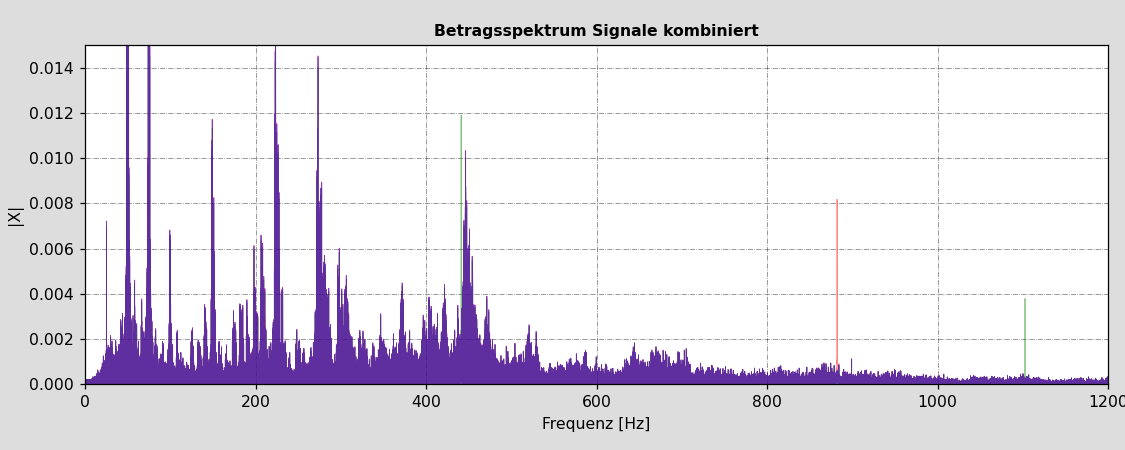

In [11]:
plotDataFFT(Soundfiles=[EngineFaulty1, EngineFaulty2, EngineNominal],
            StartValue_X=0,EndValue_X=1200,StartValue_Y=0,EndValue_Y=0.015, combined=True)

Reduzierung der Daten auf die Störfrequenzen:

<IPython.core.display.Javascript object>


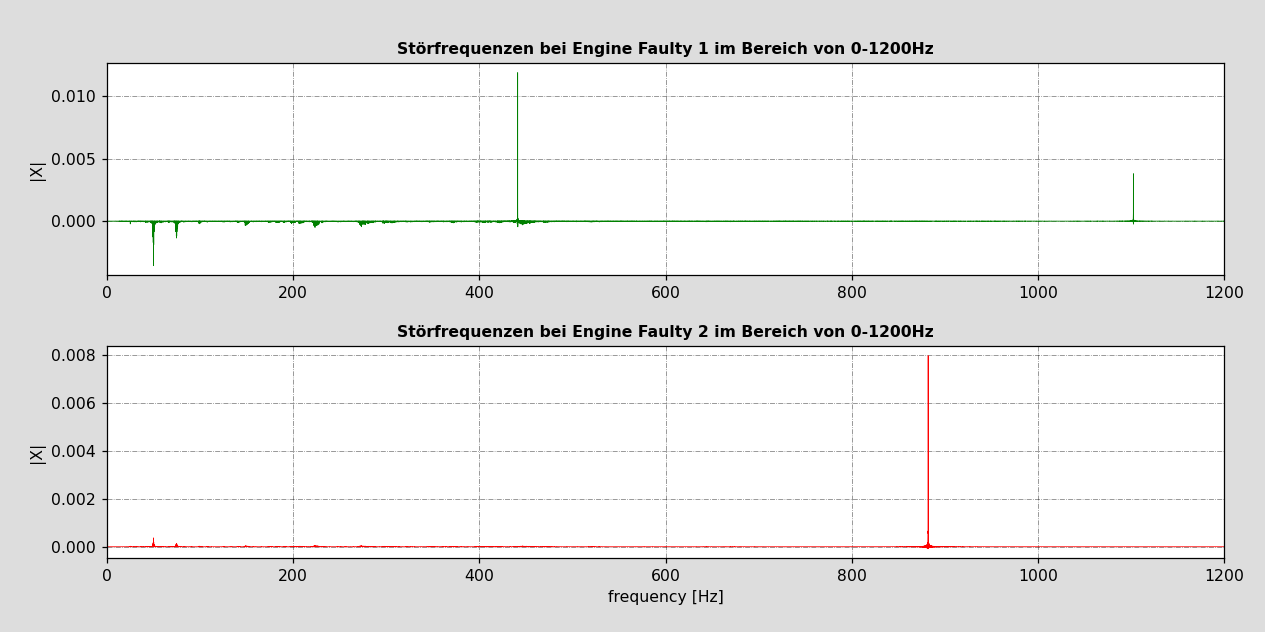

In [20]:
from SpectrumAnalysis import plotDataFFT_diff
plotDataFFT_diff(Soundfiles=[EngineFaulty1, EngineFaulty2, EngineNominal], StartValue=0, EndValue=1200)

###### Durch Ablesen lassen sich folgende Störfrequenzen ermitteln:
Engine 1: 441 Hz (Amplitude  und 1102 Hz   
Engine 2: 882 Hz

Untersuchung des zeitlichen Verlaufs der Störfrequenzen mit Hilfe eines Spektrogramms

<IPython.core.display.Javascript object>


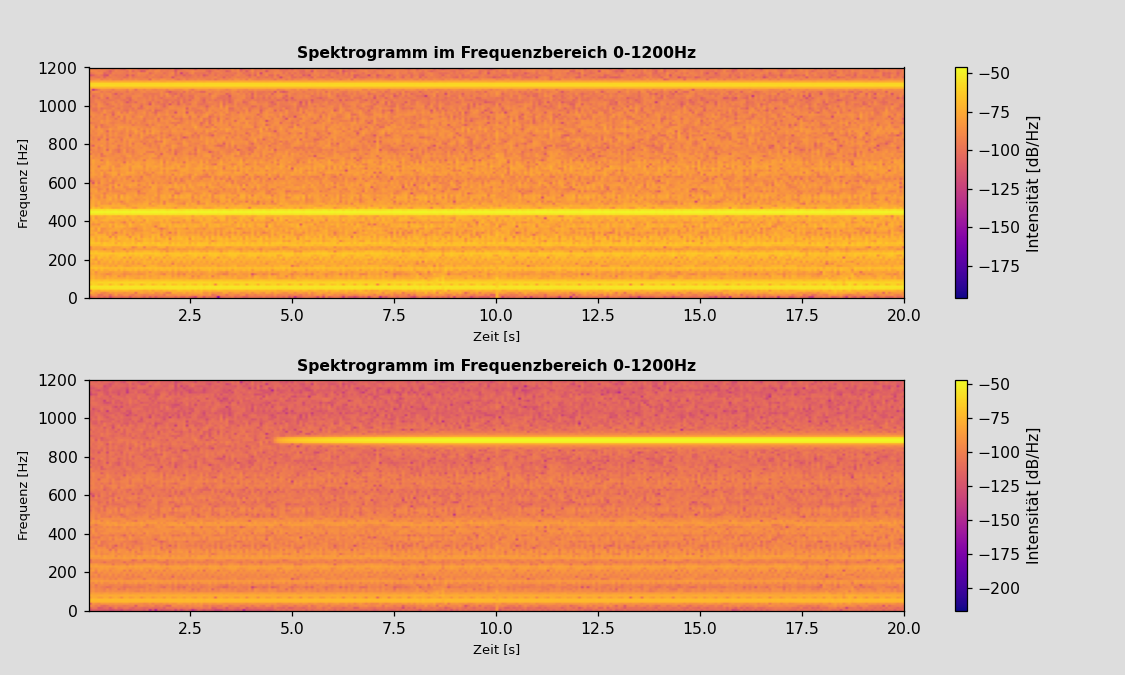

In [12]:
from SpectrumAnalysis import plot_Spectrogram
plot_Spectrogram(Soundfiles=[EngineFaulty1, EngineFaulty2, EngineNominal],StartValue=0, EndValue=1200)

#### Die Spectrograme zeigen:
Die Störfrequenzen beim Engine 1 sind über den gesamten Zeitbereich konstant.

Die Störfrequenzen beim Engine 2 bauen sich erst ab einem gewissen Zeitpunkt (ca. 4,5s) auf.

Zeitlicher Verlauf der Störfrequenz

<IPython.core.display.Javascript object>


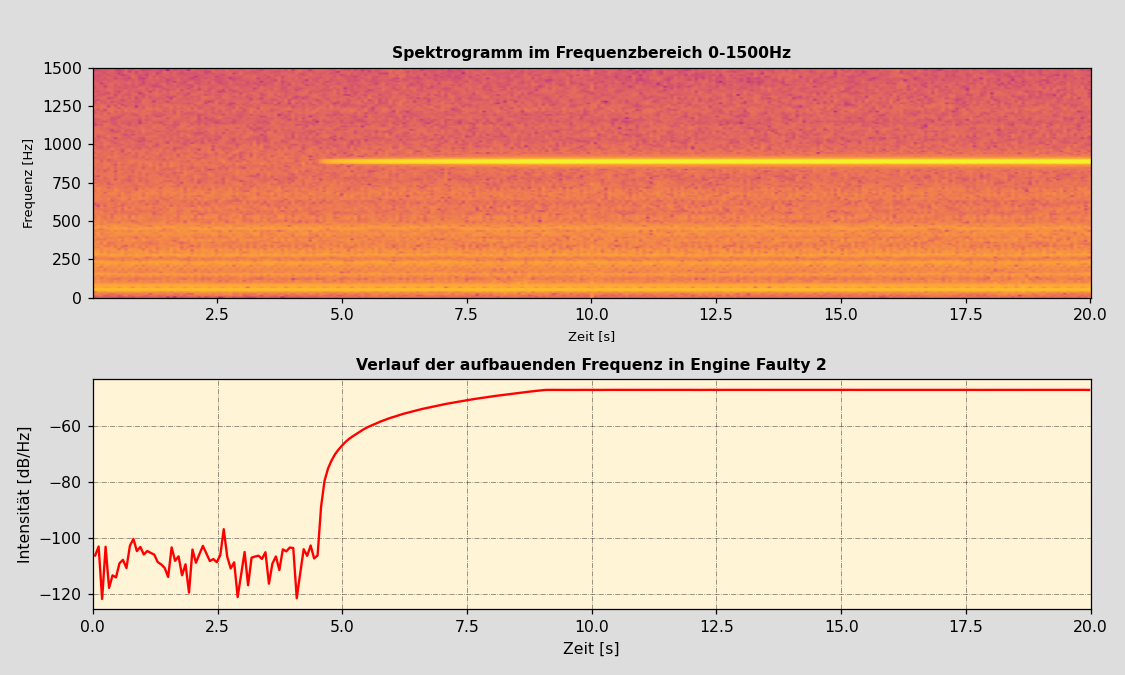

In [14]:
from SpectrumAnalysis import plot_amplitude_maxfreq
plot_amplitude_maxfreq(EngineFaulty2,EngineNominal)

Fazit:

Der Zeitpunkt 4,5s stellt den Ausgangspunkt zum Aufbauen der Störfrequenz dar.

Ab dem Zeitpunkt 9s erreicht die Störfrequenz ihr Maximum und verbleibt bei einer konstanten Intensität.